In [1]:
#Importar bibliotecas de manipulação de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importação das planilhas 
df1= pd.read_csv('train_test.csv') #Talhão 605 7 foi incluido
df2= pd.read_csv('valid_14.05.csv')

In [3]:
#Importar biblioteca de divisão de dados e escolher as variáveis que saem da análise
from sklearn.model_selection import train_test_split
X = df1.drop(['fid', 'lat', 'long', 'talhao', 'wkt_geom','Altitude', 'Produtividade', 'frutos_ver', 'Declividade', 'total_frut', 'Horas Sol' ], axis= 1)
y= df1['Produtividade']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [4]:
#Importar bibliteca do algoritmo de regressão e estabelecer a arquitetura 
from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor(min_samples_leaf=30, n_estimators=1000, n_jobs=-1, random_state= 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=30, n_estimators=1000, n_jobs=-1,
                      random_state=0)

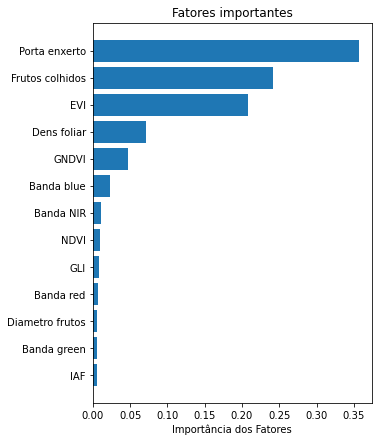

In [5]:
#Função que mostra a importância das váriaveis e fazer um gráfico de barras
feat_list = X.columns.values # Criação do objeto das colunos da planilha 
feat_imp = rfr.feature_importances_ # Função que apresenta a importancia
sort_idx = np.argsort(feat_imp) # Ordenar as variaveis de mais importancia
plt.figure(figsize=(5,7)) #Tamanho da figura
plt.barh(range(len(sort_idx)),feat_imp[sort_idx], align = 'center') #Definindo as barras do grafico
plt.yticks(range(len(sort_idx)),feat_list[sort_idx]) #importancia apresentada na ordem no eixo y
plt.xlabel('Importância dos Fatores')
plt.title('Fatores importantes')
plt.draw()
plt.show()

In [6]:
#Predição da produtividade para os talhões da validação
y_pred = rfr.predict(df2.drop(['fid', 'lat', 'long', 'talhao', 'wkt_geom','Altitude', 'Produtividade', 'frutos_ver', 'Declividade', 'total_frut', 'Horas Sol'], axis = 1))

In [7]:
#Métricas de erro entre os valores preditos da validação e os valores de referência
from sklearn import metrics # Importação das métricas de erro
from sklearn.metrics import r2_score
mae =( metrics.mean_absolute_error(df2['Produtividade'], y_pred))
rmse =( np.sqrt(metrics.mean_squared_log_error(df2['Produtividade'], y_pred)))
r2= ( r2_score(df2['Produtividade'], y_pred))
print(f'Para o modelo: MAE = {mae}, RMSE = {rmse}, R² = {r2}')

Para o modelo: MAE = 8.432642405250329, RMSE = 0.309907743572196, R² = 0.7565634759904829


In [8]:
#Adicionando um coluna dos valores preditos na planilha 
df2['Produtividade Predita'] = y_pred
df2.to_csv('valid_14.05.csv', index=False)

In [11]:
#Leitura das planilhas para importação e confecção do violinplot
violin = pd.read_csv('produtividades.csv')

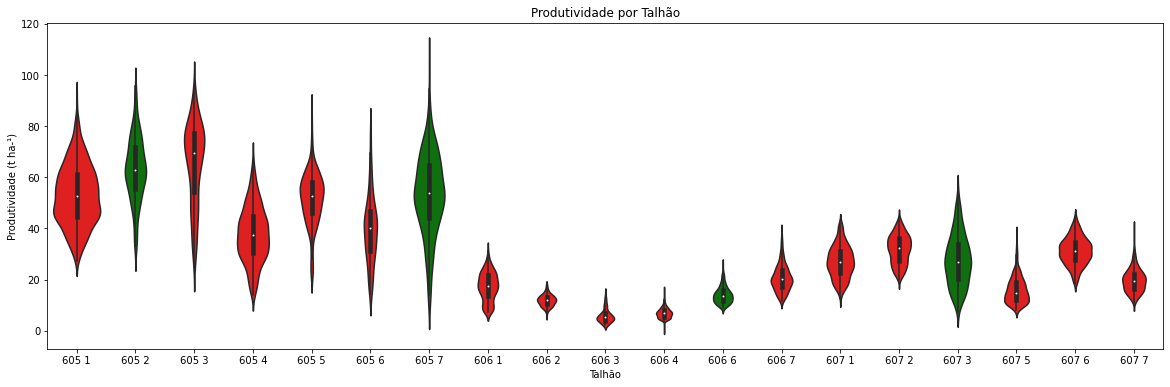

In [25]:
#Plot do violinplot
plt.figure(figsize=(20, 6)) # aumentei o tamanho da figura para melhorar a vizualização dos números dos talhões
talhoes_vermelhos = ['605 1', '605 3', '605 4', '605 5', '606 1', '606 2', '606 3', '606 4', '606 7', '607 1', '607 2', '607 5', '607 7']
talhoes_verdes = ['605 2', '605 7', '606 6', '607 3']
#Os talhões em vermelho são de treinamento e verdes de validação
cores = ['green' if coluna in talhoes_verdes else 'red' if coluna in talhoes_vermelhos else 'red' for coluna in violin.columns]
sns.violinplot(data=violin, palette=cores, scale='count') # o count aumenta os violinos para os que tem mais vizualizações
plt.title('Produtividade por Talhão')
plt.xlabel('Talhão')
plt.ylabel('Produtividade (t ha-¹)')
plt.show()

In [26]:
#Carregar as planilhas dos bloxpots 
box1 = pd.read_csv('605_2_valid.csv')
box2 = pd.read_csv('605_7_valid.csv')
box3 = pd.read_csv('606_6_valid.csv')
box4 = pd.read_csv('607_3_valid.csv')

In [27]:
#Definições dos objetos 
prod_1 = box1['produtivid'] #Para o talhão 605 2
prod_pred_1 = box1['Prod_pred']#Para o talhão 605 2
prod_2 = box2['produtivid']#Para o talhão 605 7
prod_pred_2 = box2['Prod_pred']#Para o talhão 605 7
prod_3 = box3['produtivid']#Para o talhão 606 6
prod_pred_3 = box3['Prod_pred']#Para o talhão 606 6
prod_4 = box4['produtivid']#Para o talhão 607 3
prod_pred_4 = box4['Prod_pred']#Para o talhão 607 3

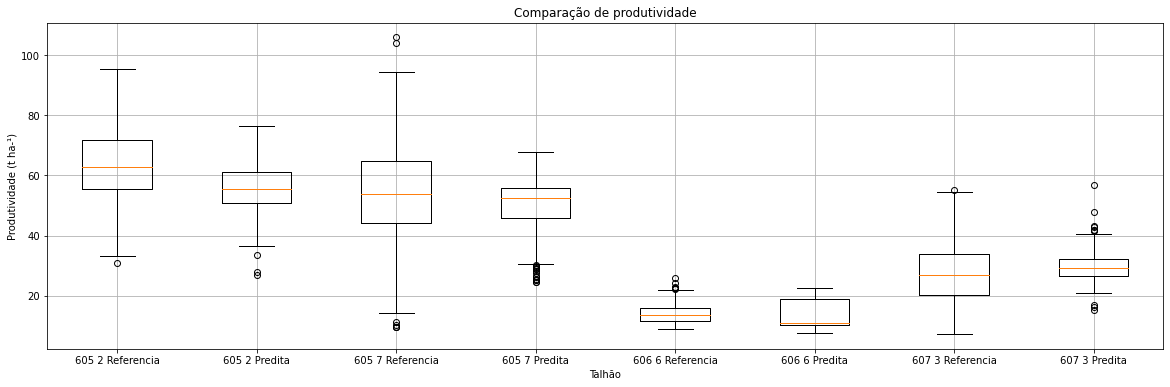

In [33]:
#Plot do boxplot de comparação entre produtividade de referencia e predita
plt.figure(figsize=(20, 6)) #tamanho da figura 
plt.boxplot([prod_1, prod_pred_1, prod_2, prod_pred_2, prod_3, prod_pred_3, prod_4, prod_pred_4], labels=['605 2 Referencia', '605 2 Predita', '605 7 Referencia', '605 7 Predita', '606 6 Referencia', '606 6 Predita', '607 3 Referencia', '607 3 Predita'])
plt.title('Comparação de produtividade') #titulo
plt.xlabel('Talhão') # legenda no eixo X
plt.ylabel('Produtividade (t ha-¹)') #legenda no eixo y
plt.grid(True) #ter o grid 
plt.show()